# Breast Cancer Wisconsin (Diagnostic) Data Set

![](https://sun9-11.userapi.com/impg/WWmNXEFJMACWsl9p5oFF1yH2Lo8z0LVgEJYmMw/cJS6qlU801s.jpg?size=874x582&quality=96&sign=c8ff2f9ea6766ba8ee2624aae662585b&type=album)

## Работу выполнили:
- Пантюхин Роман
- Капралов Александр

## Постановка задачи
- Нужно классифицировать наш набор данных и достичь более успешных результатов в правильной классификации раковых клеток
- Выяснить какие фичи больше всего влияют на диагноз

## Данные:
- radius (среднее значение расстояний от центра до точек на периметре)
- texture (стандартное отклонение значений шкалы серого)
- perimeter
- area
- smoothness (локальное изменение длины радиуса)
- compactness (периметр^2 / площадь - 1,0)
- concavity (выраженность вогнутых участков контура)
- concave points (количество вогнутых участков контура)
- symmetry ("приближение береговой линии" - 1)
- fractal dimension

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from google.colab import files
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df= files.upload()
for fn in uploaded.keys():
  print('User uploaded file «{name}» with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving data.csv to data (5).csv
User uploaded file «data.csv» with length 125204 bytes


# EDA

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Здесь «M», «B» обозначают злокачественные и доброкачественные опухоли. Оба являются двумя типами опухолей. 
Доброкачественные опухоли имеют тенденцию к медленному росту и не распространяются. 
Злокачественные опухоли могут быстро расти, проникать в близлежащие нормальные ткани и разрушать их, 
а также распространяться по всему телу. Доброкачественные опухоли не являются раковыми, а злокачественные — раковыми.

Модели машинного обучения не могут работать с набором категориальных данных в виде строки. Поэтому мы будем 
обозначать «M» (раковый) как 1, а «B» как «0».

In [ ]:
df.drop(['Unnamed: 32'],axis =1,inplace = True)
df.drop(['id'],axis =1, inplace = True)
df['diagnosis'].replace(['M', 'B'], [1, 0], inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

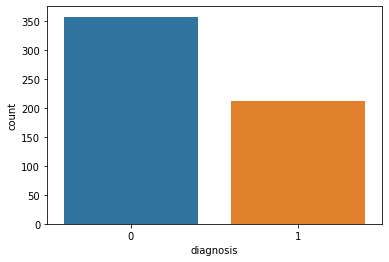

In [ ]:
sns.countplot(x='diagnosis',data=df)

из этого графика видно, что доброкачественных (не раковых) опухолей выявляется больше, чем злокачественных

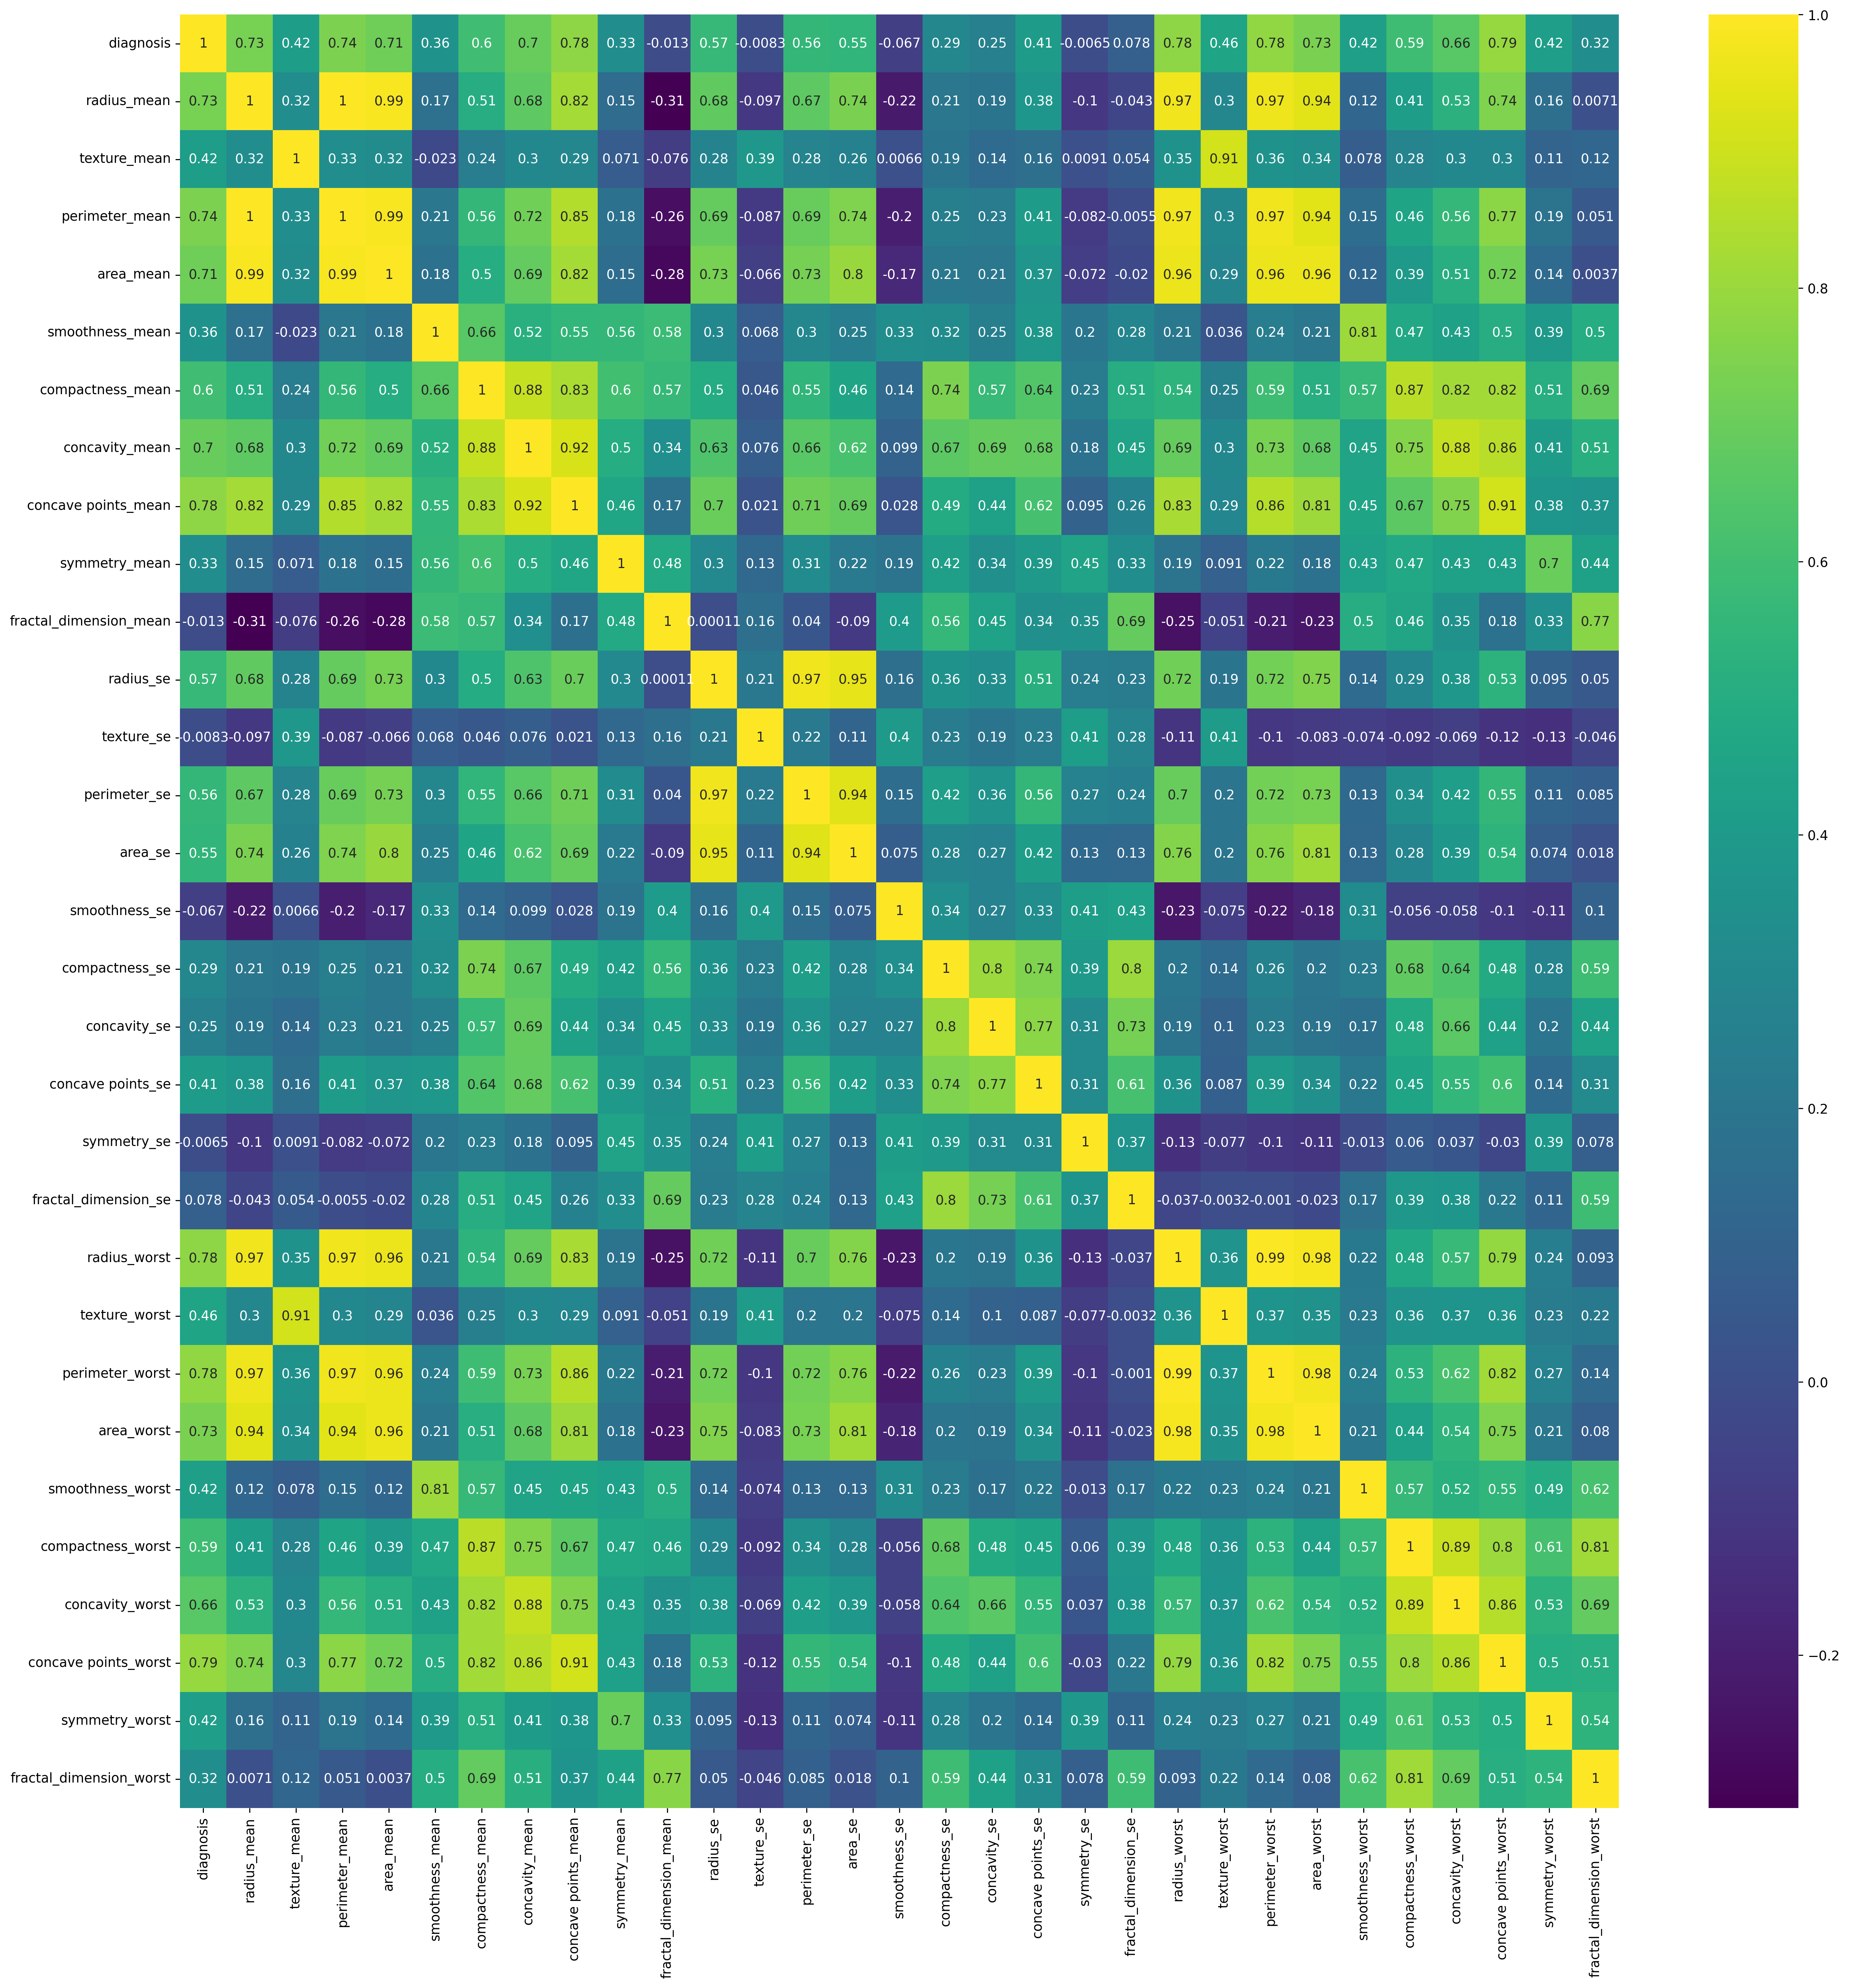

In [ ]:
plt.figure(figsize=(21,21),dpi=250,tight_layout=True)
sns.heatmap(df.corr(),annot=True,cmap="viridis")

'concave points_worst', 'perimeter_worst' and 'radius_worst' сильно коррелируют с 'diagnosis '

In [ ]:
y = df.diagnosis

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

# Готовим данные для алгоритмов

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [ ]:
acc = {}
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc['Logistic Regression'] = accuracy_score(y_test,lr.predict(x_test))
accuracy_score(y_test,lr.predict(x_test))

0.9824561403508771

In [ ]:
his = HistGradientBoostingClassifier()
his.fit(x_train,y_train)
acc['Hist Gradient Boosting'] = accuracy_score(y_test,his.predict(x_test))
accuracy_score(y_test,his.predict(x_test))

0.9824561403508771

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
acc['Random Forest'] = accuracy_score(y_test,rfc.predict(x_test))
accuracy_score(y_test,rfc.predict(x_test))

0.9824561403508771

In [ ]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
acc['Ada Boost'] = accuracy_score(y_test,abc.predict(x_test))
accuracy_score(y_test,abc.predict(x_test))

0.9912280701754386

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
acc['XGBoost'] = accuracy_score(y_test,xgb.predict(x_test))
accuracy_score(y_test,xgb.predict(x_test))

0.9824561403508771

In [ ]:
lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
acc['LightGBM'] = accuracy_score(y_test,lgb.predict(x_test))
accuracy_score(y_test,lgb.predict(x_test))

0.9912280701754386

In [ ]:
clf_dct = DecisionTreeClassifier()
clf_dct.fit(x_train,y_train)
acc['Decision Tree'] = accuracy_score(y_test, clf_dct.predict(x_test))
accuracy_score(y_test, clf_dct.predict(x_test))

0.9473684210526315

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3) 
knn_model.fit(x_train,y_train)
acc['KNeighbors'] = accuracy_score(y_test, knn_model.predict(x_test))
accuracy_score(y_test, knn_model.predict(x_test))

0.9649122807017544

In [ ]:
cat = CatBoostClassifier(iterations = 180, learning_rate = 0.1)
cat.fit(x_train, y_train)
acc["CatBoost"] = accuracy_score(y_test, cat.predict(x_test))
accuracy_score(y_test, cat.predict(x_test))


0:	learn: 0.5446970	total: 8.23ms	remaining: 1.47s
1:	learn: 0.4288996	total: 16.2ms	remaining: 1.44s
2:	learn: 0.3433828	total: 24.4ms	remaining: 1.44s
3:	learn: 0.2892058	total: 32.9ms	remaining: 1.45s
4:	learn: 0.2490688	total: 41.1ms	remaining: 1.44s
5:	learn: 0.2140922	total: 49.7ms	remaining: 1.44s
6:	learn: 0.1863795	total: 57.8ms	remaining: 1.43s
7:	learn: 0.1661567	total: 65.8ms	remaining: 1.42s
8:	learn: 0.1528782	total: 74.1ms	remaining: 1.41s
9:	learn: 0.1393508	total: 82ms	remaining: 1.39s
10:	learn: 0.1251558	total: 90.4ms	remaining: 1.39s
11:	learn: 0.1132890	total: 98.8ms	remaining: 1.38s
12:	learn: 0.1027512	total: 108ms	remaining: 1.38s
13:	learn: 0.0978782	total: 116ms	remaining: 1.37s
14:	learn: 0.0924423	total: 124ms	remaining: 1.36s
15:	learn: 0.0853672	total: 138ms	remaining: 1.42s
16:	learn: 0.0788689	total: 147ms	remaining: 1.41s
17:	learn: 0.0736571	total: 155ms	remaining: 1.4s
18:	learn: 0.0698522	total: 163ms	remaining: 1.39s
19:	learn: 0.0649683	total: 173m

0.9912280701754386

In [ ]:
key = list(acc.keys())

In [ ]:
val = [float(acc[k]) for k in key]

In [ ]:
col = sns.color_palette("YlGnBu_r",9)
col = col.as_hex()

AxesSubplot(0.125,0.125;0.775x0.755)


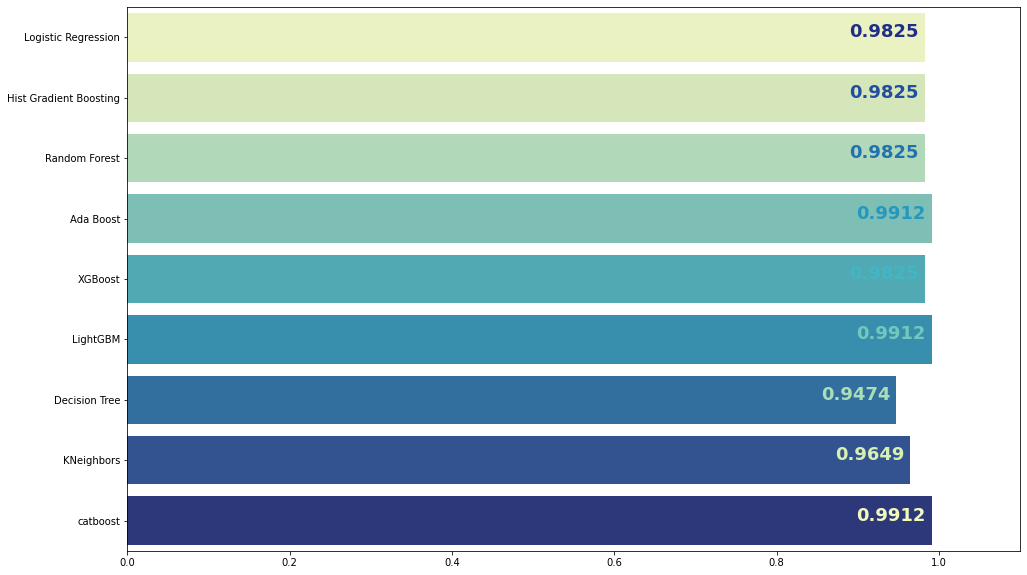

In [ ]:
fig,acc = plt.subplots(figsize = (16,10))
acc = sns.barplot(val,key,palette="YlGnBu")
acc.set_xlim(0,1.1)
print(acc)
for i in range(len(key)):
    acc.text(val[i]-0.05,i,str(np.round(val[i],4)),fontdict = dict(color = col[i],fontsize = 18,ha = 'center'),weight = 'bold')

## Результаты:
Из этих результатов мы понимаем, что использование методов CatBoost, LightGBM, AdaBoost при классификации нашего набора данных позволит достичь более успешных результатов в правильной классификации опухолевых клеток.
Дано графическое представление процентного соотношения и степени точности этих методов на рисунке выше.
Мы выяснили, что фичи 'concave points_worst', 'perimeter_worst' and 'radius_worst' больше всего влияют на  'diagnosis'